<a href="https://colab.research.google.com/github/thasneema2414/ML-Projects/blob/master/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data_copy = data

In [ ]:
#Exploratory Data Analysis

In [ ]:
#step1: Knowing the features and Data types
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# step2: Removing unique value columns
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
#step3: Null value Treatment
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#step4: Transforming the data
data.Geography.unique()     

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
#Dummy variable creation for Gender 
data = pd.get_dummies(data=data, columns=['Gender'])

In [ ]:
data.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,2,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,2,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#Label encoding for Geography
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['Geography'] = le.fit_transform(data['Geography'])

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,2,15647311,Hill,608,2,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,5,15737888,Mitchell,850,2,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#step5: Graphical Data Analysis

In [ ]:
data.corr()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
CreditScore,1.000000,0.007888,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.002857,-0.002857
Geography,0.007888,1.000000,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943,-0.004719,0.004719
Age,-0.003965,0.022812,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.027544,-0.027544
Tenure,0.000842,0.003739,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.014733,0.014733
Balance,0.006268,0.069408,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.012087,0.012087
NumOfProducts,0.012238,0.003972,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.021859,-0.021859
HasCrCard,-0.005458,-0.008523,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.005766,0.005766
IsActiveMember,0.025651,0.006724,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.022544,0.022544
EstimatedSalary,-0.001384,-0.001369,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.008112,-0.008112
Exited,-0.027094,0.035943,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.106512,-0.106512


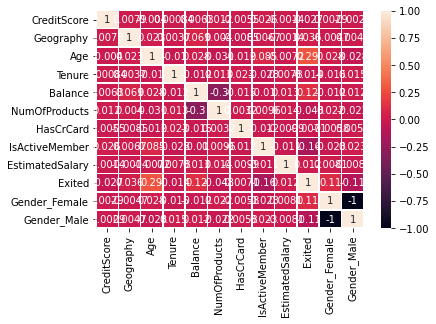

In [ ]:
#heatmap
import seaborn as sns
sns.heatmap(data.corr(),annot=True,linewidths=.5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


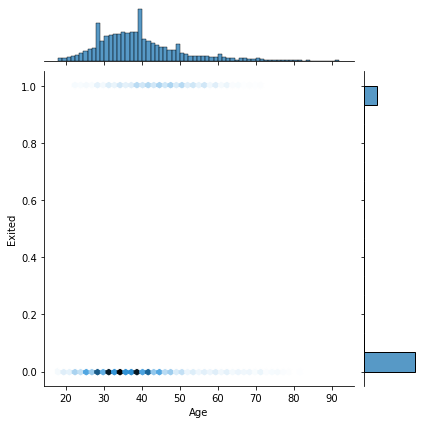

In [ ]:
sns.jointplot('Age','Exited',data=data,kind='hex')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


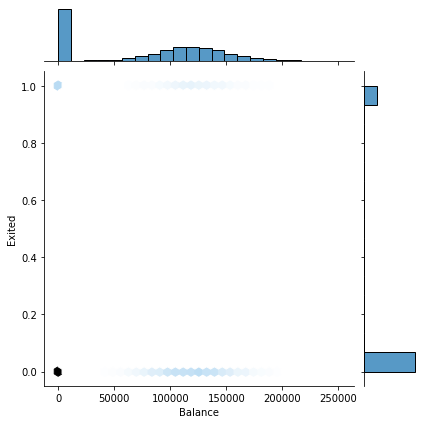

In [ ]:
sns.jointplot('Balance','Exited',data=data,kind='hex')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


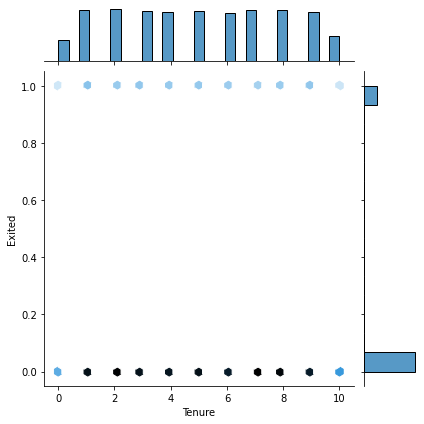

In [ ]:
sns.jointplot('Tenure','Exited',data=data,kind='hex')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


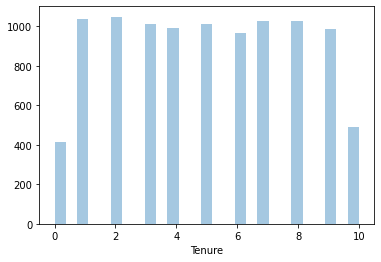

In [ ]:
sns.distplot(data.Tenure,kde=0)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


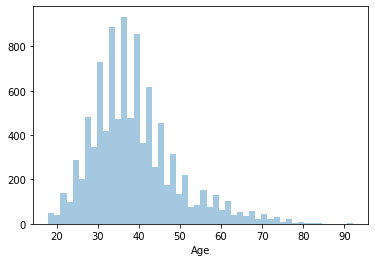

In [ ]:
sns.distplot(data.Age,kde=0)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


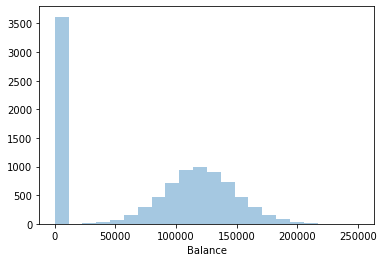

In [ ]:
sns.distplot(data.Balance,kde=0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


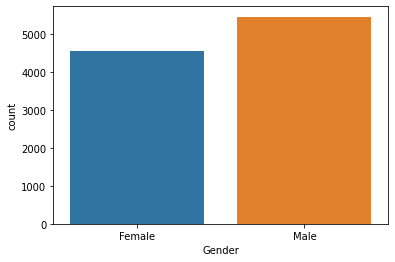

In [ ]:
sns.countplot('Gender',data=data_copy)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


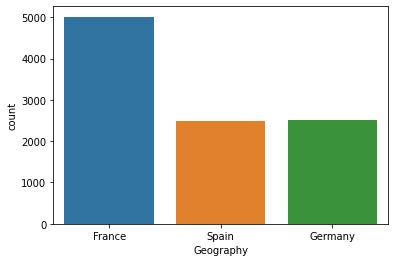

In [ ]:
sns.countplot('Geography',data=data_copy)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


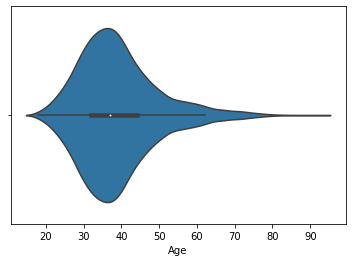

In [ ]:
sns.violinplot('Age',data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


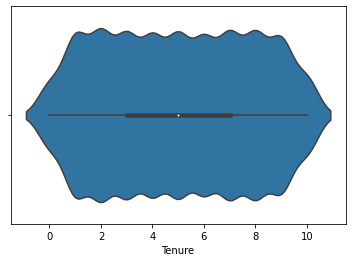

In [ ]:
sns.violinplot('Tenure',data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


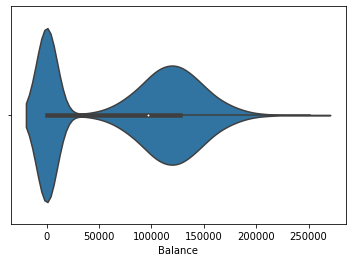

In [ ]:
sns.violinplot('Balance',data=data)

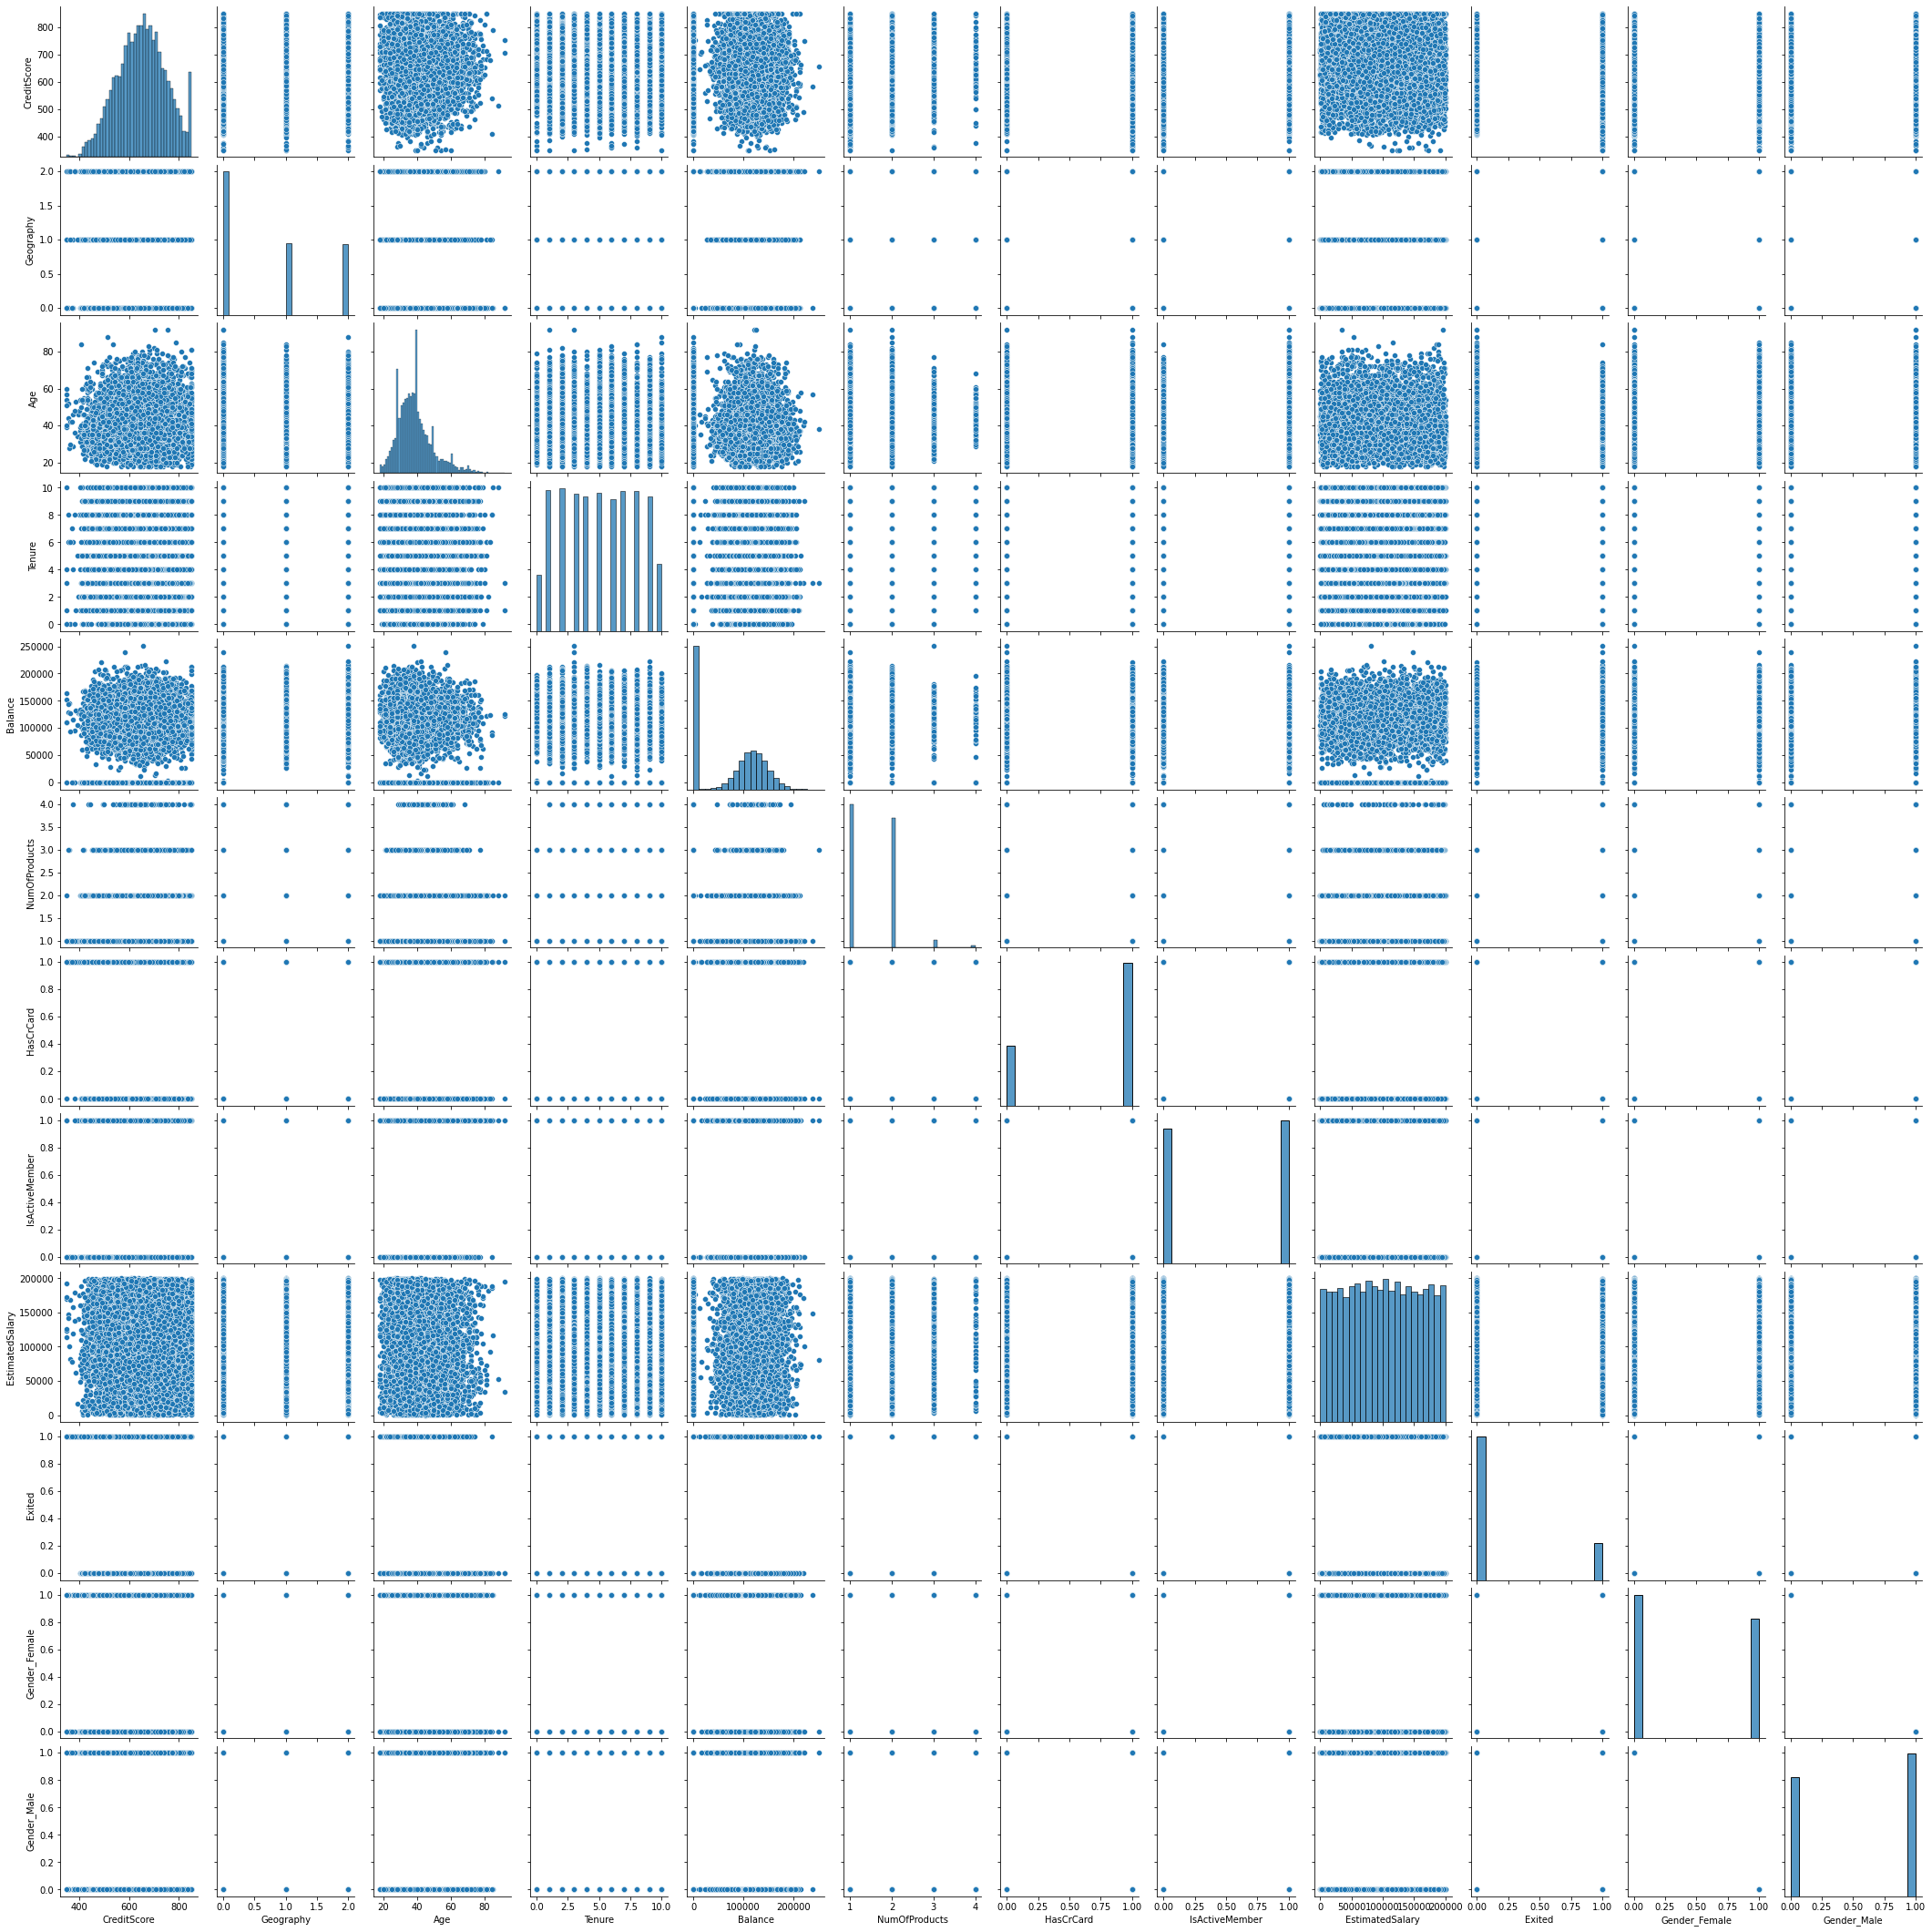

In [ ]:
sns.pairplot(data)

CreditScore           AxesSubplot(0.125,0.125;0.0545775x0.755)
Geography          AxesSubplot(0.190493,0.125;0.0545775x0.755)
Age                AxesSubplot(0.255986,0.125;0.0545775x0.755)
Tenure             AxesSubplot(0.321479,0.125;0.0545775x0.755)
Balance            AxesSubplot(0.386972,0.125;0.0545775x0.755)
NumOfProducts      AxesSubplot(0.452465,0.125;0.0545775x0.755)
HasCrCard          AxesSubplot(0.517958,0.125;0.0545775x0.755)
IsActiveMember     AxesSubplot(0.583451,0.125;0.0545775x0.755)
EstimatedSalary    AxesSubplot(0.648944,0.125;0.0545775x0.755)
Exited             AxesSubplot(0.714437,0.125;0.0545775x0.755)
Gender_Female       AxesSubplot(0.77993,0.125;0.0545775x0.755)
Gender_Male        AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

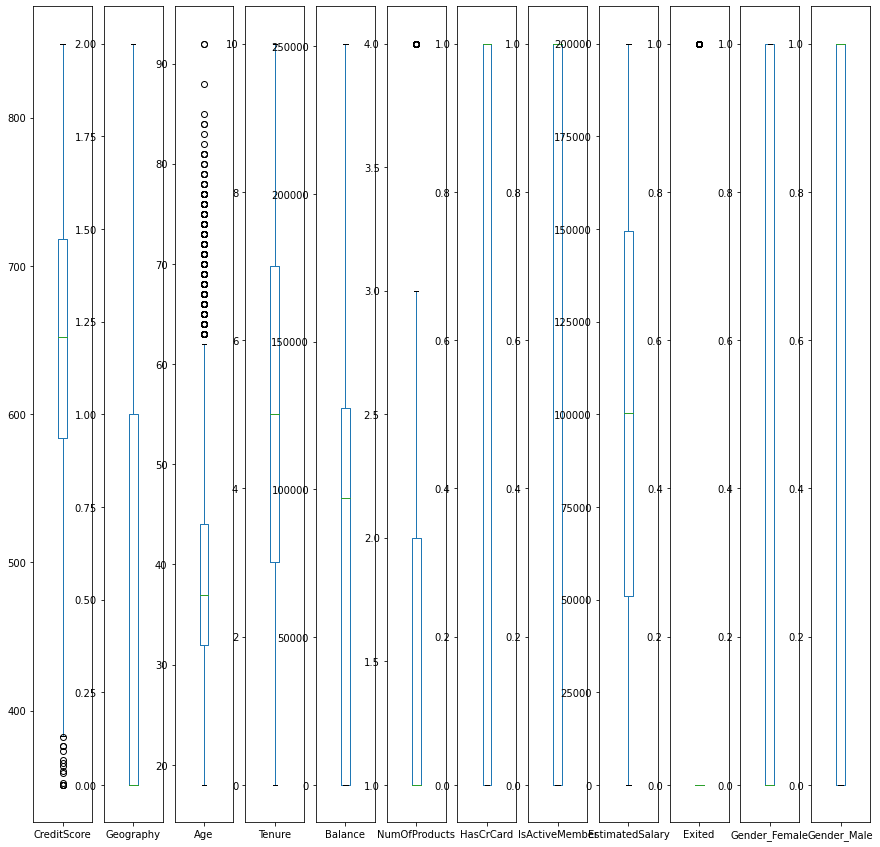

In [ ]:
#outlier removal
from matplotlib import pyplot as plt
data.plot(kind='box',subplots=True,figsize=(15,15))

In [ ]:
#outlier present in NumOfProducts

In [ ]:
data_copy.shape

(10000, 11)

In [ ]:
data.NumOfProducts.describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

In [ ]:
p1 = data.NumOfProducts.quantile(0.25)

In [ ]:
p3 = data.NumOfProducts.quantile(0.75)

In [ ]:
IQR = p3-p1

In [ ]:
l_limit = p1-1.5*IQR

In [ ]:
l_limit

-0.5

In [ ]:
u_limit = p3+1.5*IQR

In [ ]:
u_limit

3.5

In [ ]:
#removing values beyoned u_limit
data= data[data.NumOfProducts<u_limit]

In [ ]:
data.shape

(9940, 12)

CreditScore           AxesSubplot(0.125,0.125;0.0545775x0.755)
Geography          AxesSubplot(0.190493,0.125;0.0545775x0.755)
Age                AxesSubplot(0.255986,0.125;0.0545775x0.755)
Tenure             AxesSubplot(0.321479,0.125;0.0545775x0.755)
Balance            AxesSubplot(0.386972,0.125;0.0545775x0.755)
NumOfProducts      AxesSubplot(0.452465,0.125;0.0545775x0.755)
HasCrCard          AxesSubplot(0.517958,0.125;0.0545775x0.755)
IsActiveMember     AxesSubplot(0.583451,0.125;0.0545775x0.755)
EstimatedSalary    AxesSubplot(0.648944,0.125;0.0545775x0.755)
Exited             AxesSubplot(0.714437,0.125;0.0545775x0.755)
Gender_Female       AxesSubplot(0.77993,0.125;0.0545775x0.755)
Gender_Male        AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

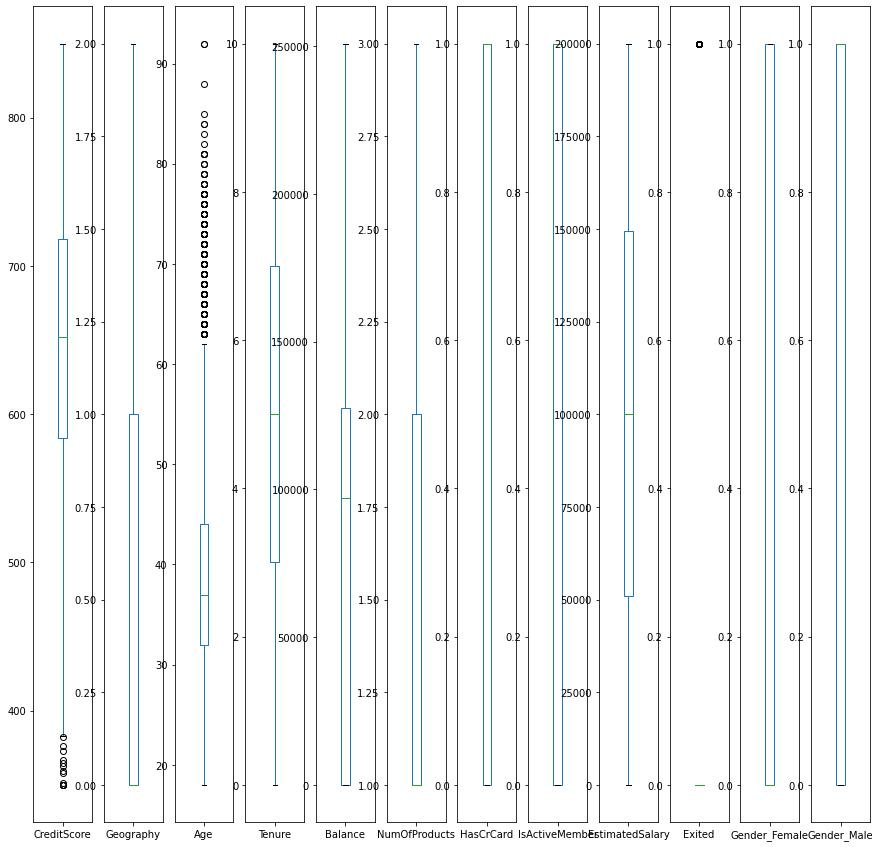

In [ ]:
data.plot(kind='box',subplots=True,figsize=(15,15))

In [ ]:
data.Age.describe()

count    9940.000000
mean       38.880986
std        10.485202
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

In [ ]:
p1 = data.Age.quantile(0.25)

In [ ]:
p3 = data.Age.quantile(0.75)

In [ ]:
IQR = p3-p1

In [ ]:
Al_limit = p1-1.5*IQR
Au_limit = p1-1.5*IQR

In [ ]:
data= data[data.NumOfProducts<u_limit]

In [ ]:
data.shape

(9940, 12)

CreditScore           AxesSubplot(0.125,0.125;0.0545775x0.755)
Geography          AxesSubplot(0.190493,0.125;0.0545775x0.755)
Age                AxesSubplot(0.255986,0.125;0.0545775x0.755)
Tenure             AxesSubplot(0.321479,0.125;0.0545775x0.755)
Balance            AxesSubplot(0.386972,0.125;0.0545775x0.755)
NumOfProducts      AxesSubplot(0.452465,0.125;0.0545775x0.755)
HasCrCard          AxesSubplot(0.517958,0.125;0.0545775x0.755)
IsActiveMember     AxesSubplot(0.583451,0.125;0.0545775x0.755)
EstimatedSalary    AxesSubplot(0.648944,0.125;0.0545775x0.755)
Exited             AxesSubplot(0.714437,0.125;0.0545775x0.755)
Gender_Female       AxesSubplot(0.77993,0.125;0.0545775x0.755)
Gender_Male        AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

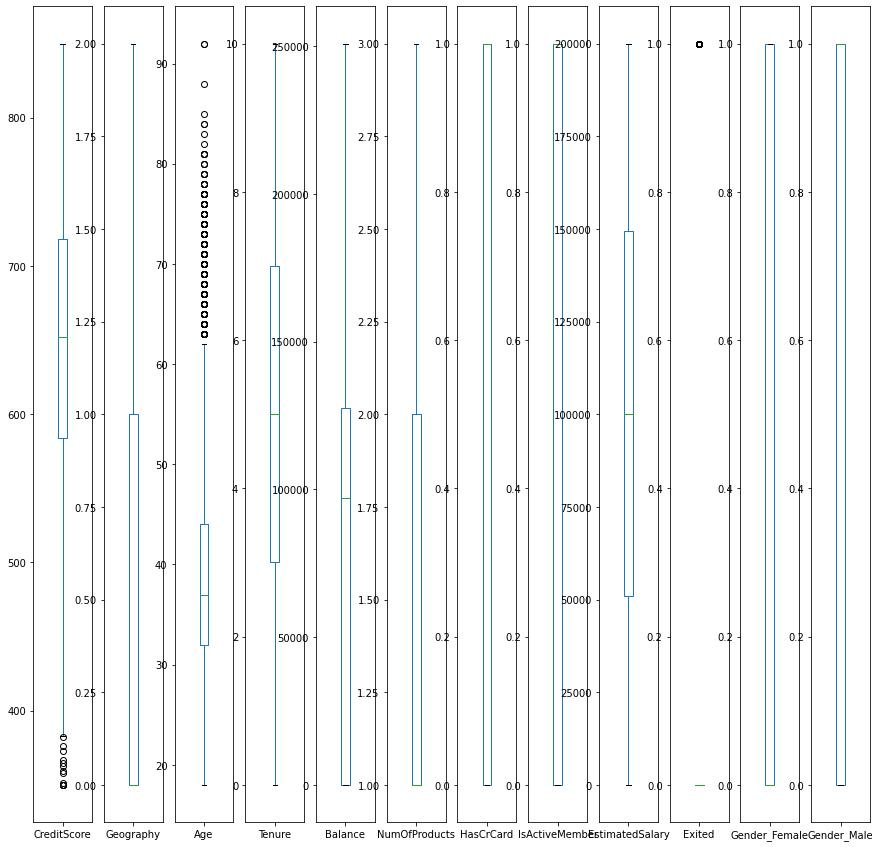

In [ ]:
data.plot(kind='box',subplots=True,figsize=(15,15))

In [ ]:
#scaling of data to be used only in non tree models
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
x = pd.DataFrame(x)

In [ ]:
X = data.drop('Exited',axis=1)

In [ ]:
y = data.Exited

In [ ]:
x = scale.fit_transform(X)

In [ ]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
x.head()  #all values in x are between -3 and 3.

,0,1,2,3,4,5,6,7,8,9,10
0,-0.326110,-0.901890,0.297483,-1.041259,-1.223855,-0.935677,0.645884,0.969870,0.022376,1.098379,-1.098379
1,-0.439952,1.512868,0.202106,-1.387070,0.118987,-0.935677,-1.548267,0.969870,0.217018,1.098379,-1.098379
2,-1.536977,-0.901890,0.297483,1.033605,1.334368,2.695964,0.645884,-1.031066,0.241171,1.098379,-1.098379
3,0.501833,-0.901890,0.011351,-1.387070,-1.223855,0.880143,-1.548267,-1.031066,-0.108424,1.098379,-1.098379
4,2.064576,1.512868,0.392860,-1.041259,0.787188,-0.935677,0.645884,0.969870,-0.364775,1.098379,-1.098379


In [ ]:
X.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,2,41,1,83807.86,1,0,1,112542.58,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0
4,850,2,43,2,125510.82,1,1,1,79084.10,1,0


In [ ]:
#univariable selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
order = SelectKBest(score_func=chi2,k=11)

In [ ]:
order = order.fit(X,y)

In [ ]:
X

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,2,41,1,83807.86,1,0,1,112542.58,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0
4,850,2,43,2,125510.82,1,1,1,79084.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1


In [ ]:
feature_score = pd.DataFrame(order.scores_,columns=['Feature_score'])

In [ ]:
feature_score

,Feature_score
0,1.109805e+02
1,1.325312e+01
2,2.232991e+03
3,3.942047e+00
4,6.931546e+06
5,2.218307e+01
6,1.296685e-01
7,1.198378e+02
8,4.190887e+04
9,5.853835e+01


In [ ]:
features = pd.DataFrame(X.columns,columns=['features'])

In [ ]:
features

,features
0,CreditScore
1,Geography
2,Age
3,Tenure
4,Balance
5,NumOfProducts
6,HasCrCard
7,IsActiveMember
8,EstimatedSalary
9,Gender_Female


In [ ]:
out = pd.concat([features,feature_score],axis=1)

In [ ]:
out

,features,Feature_score
0,CreditScore,1.109805e+02
1,Geography,1.325312e+01
2,Age,2.232991e+03
3,Tenure,3.942047e+00
4,Balance,6.931546e+06
5,NumOfProducts,2.218307e+01
6,HasCrCard,1.296685e-01
7,IsActiveMember,1.198378e+02
8,EstimatedSalary,4.190887e+04
9,Gender_Female,5.853835e+01


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
a = model.feature_importances_

In [ ]:
a

array([0.13850169, 0.04424414, 0.23903437, 0.10842151, 0.13527352,
       0.12647235, 0.02091287, 0.03680457, 0.13807512, 0.00677018,
       0.00548969])

In [ ]:
orders = pd.DataFrame(a,index=X.columns)
orders

,0
CreditScore,0.138502
Geography,0.044244
Age,0.239034
Tenure,0.108422
Balance,0.135274
NumOfProducts,0.126472
HasCrCard,0.020913
IsActiveMember,0.036805
EstimatedSalary,0.138075
Gender_Female,0.006770


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
D_model = DecisionTreeClassifier()

In [ ]:
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression()

In [ ]:
from sklearn.svm import  SVC
sv_model = SVC()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
def val(model):
  model.fit(X_train,y_train)
  print(model.score(X_test,y_test))
models = [D_model,l_model,sv_model,k_model]

for i in models:
  val(i)

0.7758551307847082
0.7951710261569417
0.8060362173038229
0.7678068410462776


In [ ]:
X_fs = X

In [ ]:
X_fs.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,2,41,1,83807.86,1,0,1,112542.58,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0
4,850,2,43,2,125510.82,1,1,1,79084.10,1,0


In [ ]:
X_fs.drop(['Tenure'],axis=1)

,CreditScore,Geography,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
0,619,0,42,0.00,1,1,1,101348.88,1,0
1,608,2,41,83807.86,1,0,1,112542.58,1,0
2,502,0,42,159660.80,3,1,0,113931.57,1,0
3,699,0,39,0.00,2,0,0,93826.63,1,0
4,850,2,43,125510.82,1,1,1,79084.10,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,0.00,2,1,0,96270.64,0,1
9996,516,0,35,57369.61,1,1,1,101699.77,0,1
9997,709,0,36,0.00,1,0,1,42085.58,1,0
9998,772,1,42,75075.31,2,1,0,92888.52,0,1


In [ ]:
Xfs_train,Xfs_test,yfs_train,yfs_test = train_test_split(X_fs,y)

In [ ]:
def val(model):                               #by removing Tenure
  model.fit(Xfs_train,yfs_train)
  print(model.score(Xfs_test,yfs_test))
models = [D_model,l_model,sv_model,k_model]

for i in models:
  val(i)

0.786317907444668
0.8016096579476861
0.8016096579476861
0.7657947686116701


In [ ]:
#by removing gender
X_fs.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,2,41,1,83807.86,1,0,1,112542.58,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0
4,850,2,43,2,125510.82,1,1,1,79084.10,1,0


In [ ]:
X_fs.drop(['Gender_Female','Gender_Male'],axis=1)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,2,0.00,1,1,1,101348.88
1,608,2,41,1,83807.86,1,0,1,112542.58
2,502,0,42,8,159660.80,3,1,0,113931.57
3,699,0,39,1,0.00,2,0,0,93826.63
4,850,2,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64
9996,516,0,35,10,57369.61,1,1,1,101699.77
9997,709,0,36,7,0.00,1,0,1,42085.58
9998,772,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
def val(model):                               
  model.fit(Xfs_train,yfs_train)
  print(model.score(Xfs_test,yfs_test))
models = [D_model,l_model,sv_model,k_model]

for i in models:
  val(i)

0.7895372233400403
0.8016096579476861
0.8016096579476861
0.7657947686116701
